In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import matplotlib.style as style

pd.set_option('display.max_columns', 100)

# Read Data

In [2]:
df_train = pd.read_csv('application_train.csv')
df_train.sample(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
49069,156817,0,Cash loans,F,N,N,0,324000.0,1416406.5,46939.5,1269000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.046220,-17318,-1580,-4827.0,-858,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,TUESDAY,15,0,0,0,0,0,0,Kindergarten,NaN,0.731620,0.565608,0.0619,0.0766,0.9831,NaN,NaN,0.00,...,0.0625,0.0766,0.9831,NaN,NaN,0.00,0.1379,0.1667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,block of flats,0.0441,"Stone, brick",No,0.0,0.0,0.0,0.0,-467.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
285046,430120,0,Cash loans,F,N,Y,1,270000.0,640080.0,29970.0,450000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.009334,-15884,-1926,-1019.0,-4624,NaN,1,1,0,1,0,0,Laborers,3.0,2,2,SATURDAY,16,0,0,0,0,0,0,Business Entity Type 3,NaN,0.632312,0.357293,0.0835,0.0792,0.9866,0.8164,0.0216,0.00,...,0.0843,0.0792,0.9866,0.8189,0.0218,0.00,0.1724,0.1667,0.2083,0.0660,0.0693,0.0964,0.0000,0.0000,reg oper account,block of flats,0.0863,Panel,No,3.0,0.0,2.0,0.0,-1928.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
78168,190627,0,Revolving loans,M,Y,Y,0,180000.0,450000.0,22500.0,450000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.022800,-20867,-3859,-7543.0,-4377,3.0,1,1,0,1,1,0,Managers,2.0,2,2,SATURDAY,11,0,0,0,0,0,0,Medicine,0.810501,0.652606,0.275000,0.1220,0.1023,0.9891,0.8504,0.0928,0.12,...,0.1124,0.1063,0.9891,0.8524,0.0910,0.12,0.1034,0.3333,0.3750,0.0309,0.0915,0.1240,0.0039,0.0732,reg oper account,block of flats,0.1705,"Stone, brick",No,3.0,0.0,3.0,0.0,-744.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,2.0,6.0
106814,223924,0,Cash loans,F,Y,Y,0,157500.0,225000.0,17905.5,225000.0,Family,Commercial associate,Secondary / secondary special,Civil marriage,Office apartment,0.025164,-12157,-1308,-6831.0,-1853,13.0,1,1,0,1,0,0,HR staff,2.0,2,2,MONDAY,15,0,0,0,0,1,1,Business Entity Type 3,0.750697,0.079042,NaN,0.0742,0.0000,0.9866,0.8164,0.0066,0.08,...,0.0749,0.0000,0.9866,0.8189,0.0067,0.08,0.0690,0.3333,0.3750,0.0451,0.0599,0.0696,0.0078,0.0210,reg oper account,block of flats,0.0619,"Stone, brick",No,1.0,0.0,1.0,0.0,-297.0,0,1,0,0,0,0

In [3]:
df_train.shape

(307511, 122)

Dataset consists of 307511 Rows and 122 Columns.

In [4]:
df_train['SK_ID_CURR'].nunique()

307511

In [5]:
df_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [6]:
df_train[df_train['TARGET']==1].AMT_CREDIT.sum()

13846851949.5

1. There are 307511 Customers who used Home Credit Indonesia Services.
2. There are 24825 Customers (~8%) who Defaults on Loans.
3. This made Company suffer a loss of 13.8 Billion Rupiah.

# Feature Extraction

## Age

- We can get Customers Age based on column 'DAYS_BIRTH' values. 
- Column 'DAYS_BIRTH' contains Client's age in days at the time of application which means the Age only relative to the application.
- At this stage we will assume that one year is 365 days.

In [7]:
df_train['AGE'] = round((df_train['DAYS_BIRTH']*-1)/365)

After getting age of each customer, we can group customers by age. In this stage we will group customers into several groups :
- Age < 20 : Late Ten
- Age >= 20 and Age < 30 : Twenty
- Age >=30 and Age < 40 : Thirty
- Age >= 40 and Age < 50 : Fifty
- Age >= 50 and Age < 60 : Sixty
- Age > 60 : Above_sixty

In [8]:
def segment_age(x) :
    if x['AGE'] < 20 :
        segment = "Late Ten"
    elif x['AGE'] >= 20 and x['AGE'] < 30 :
        segment = "Twenty"
    elif x['AGE'] >= 30 and x['AGE'] < 40 :
        segment = "Thirty"
    elif x['AGE'] >= 40 and x['AGE'] < 50 :
        segment = "Fourty"
    elif x['AGE'] >= 50 and x['AGE'] < 60 :
        segment = "Fifty"
    else :
        segment = "Above_Sixty"
    return segment

In [9]:
df_train['AGE_GROUP'] = df_train.apply(lambda x : segment_age(x), axis=1)

In [10]:
df_train['AGE_GROUP'].value_counts()

Thirty         81944
Fourty         77415
Fifty          68039
Twenty         41093
Above_Sixty    39020
Name: AGE_GROUP, dtype: int64

## Is Parents

In [11]:
df_train['IS_PARENTS'] = np.where(df_train['CNT_CHILDREN'] > 0, 1,0)

In [12]:
df_train['IS_PARENTS'].value_counts()

0    215371
1     92140
Name: IS_PARENTS, dtype: int64

# EDA

## Descriptive Statistics

In [13]:
df_train.dtypes.value_counts()

float64    66
int64      41
object     17
int32       1
dtype: int64

In [14]:
nums = []
cats = []
dis_num = []

for col in df_train.columns :
    if df_train[col].dtype == 'object' :
        cats.append(col)
    elif df_train[col].nunique() < 25 :
        dis_num.append(col)
    else :
        nums.append(col)
print(len(nums))
print(len(cats))
print(len(dis_num))

62
17
46


In [15]:
df_train[nums].describe()

,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_YEAR,AGE
count,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,307510.000000,265992.000000,307511.000000
mean,278180.518577,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.977752,0.755746,0.044595,0.078078,0.149213,0.225897,0.231625,0.067169,0.101954,0.108607,0.008651,0.028236,0.102547,1.422245,1.405292,-962.858788,1.899974,43.938646
std,102790.175348,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,11.944812,0.211062,1.910602e-01,0.194844,0.10824,0.082438,0.059223,0.113280,0.076036,0.134576,0.100049,0.144641,0.161380,0.081184,0.092576,0.110565,0.047732,0.069523,0.107936,0.084307,0.064575,0.110111,0.074445,0.132256,0.100977,0.143709,0.161160,0.081750,0.097880,0.111845,0.046276,0.070254,0.109076,0.082179,0.059897,0.112066,0.076144,0.134467,0.100368,0.145067,0.161934,0.082167,0.093642,0.112260,0.047415,0.070166,0.107462,2.400989,2.379803,826.808487,1.869295,11.964047
min,100002.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,0.014568,8.173617e-08,0.000527,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,21.000000
25%,189145.500000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,5.000000,0.334007,3.924574e-01,0.370650,0.05770,0.044200,0.976700,0.687200,0.007800,0.000000,0.069000,0.166700,0.083300,0.0

In [16]:
df_train[dis_num].describe()

,TARGET,CNT_CHILDREN,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,IS_PARENTS
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,306490.000000,306490.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,307511.000000
mean,0.080729,0.417052,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.143421,0.100049,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,0.299632
std,0.272419,0.722121,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,0.446698,0.362291,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,0.458097
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,3.000000,2.000000,2.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

In [17]:
df_train[cats].describe()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,AGE_GROUP
count,307511,307511,307511,307511,306219,307511,307511,307511,307511,211120,307511,307511,97216,153214,151170,161756,307511
unique,2,3,2,2,7,8,5,6,6,18,7,58,4,3,7,2,5
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,TUESDAY,Business Entity Type 3,reg oper account,block of flats,Panel,No,Thirty
freq,278232,202448,202924,213312,248526,158774,218391,196432,272868,55186,53901,67992,73830,150503,66040,159428,81944


## Correlations

In [18]:
# Find Correlations with the Target then Descending sort it 
correlations = df_train.corr()['TARGET'].sort_values(ascending=False) 

#Display 15 best values of each Positive and Negative Correlations
print('Most Positive Correlations:\n',correlations.head(15))
print('Most Negative Correlations:\n',correlations.tail(15))

Most Positive Correlations:
 TARGET                         1.000000
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
DAYS_REGISTRATION              0.041975
OWN_CAR_AGE                    0.037612
LIVE_CITY_NOT_WORK_CITY        0.032518
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
Name: TARGET, dtype: float64
Most Negative Correlations:
 LIVINGAREA_AVG               -0.032997
FLOORSMIN_MEDI               -0.033394
FLOORSMIN_AVG                -0.033614
ELEVATORS_MEDI               -0.033863
ELEVATORS_AVG                -0.034199
REGION_POPULATION_RELATIVE   -0.037227
AMT_GOODS_PRICE              -0.039645
FLOORSMAX_MODE               -0.043226
F

We can see that the correlations is not very strong (in fact they are all considered very weak) but these features will still be useful for a machine learning model to predict whether or not customer will default.

## Age Group

- We can see that 'AGE' have correlations value -0.078263 with 'TARGET'. We can indicate from those value that the older customers is, the less likely they will Default.
- So in this stage we will Visualize it so it's easier to understand.

In [19]:
ordered_age = ["Twenty", "Thirty", "Fourty", "Fifty", "Above_Sixty"]

group_age = df_train.groupby(['AGE_GROUP', 'TARGET'])['SK_ID_CURR'].nunique().reset_index(name='NUM_OF_CUSTOMERS')
group_age['Pct_Defaults'] = round((group_age['NUM_OF_CUSTOMERS']*100)/group_age.groupby(['AGE_GROUP'])['NUM_OF_CUSTOMERS'].transform('sum'),2)
group_age = group_age[group_age['TARGET']==1]
group_age['AGE_GROUP'] = pd.Categorical(group_age['AGE_GROUP'], categories=ordered_age, ordered=True)
group_age

,AGE_GROUP,TARGET,NUM_OF_CUSTOMERS,Pct_Defaults
1,Above_Sixty,1,1933,4.95
3,Fifty,1,4229,6.22
5,Fourty,1,5983,7.73
7,Thirty,1,7972,9.73
9,Twenty,1,4708,11.46


In [20]:
age = df_train.groupby(['AGE_GROUP'])['SK_ID_CURR'].nunique().reset_index(name='NUM_OF_CUSTOMERS')
age['Pct'] = round((age['NUM_OF_CUSTOMERS']*100)/df_train['SK_ID_CURR'].nunique(),2)
age['AGE_GROUP'] = pd.Categorical(age['AGE_GROUP'], categories=ordered_age, ordered=True)
age

,AGE_GROUP,NUM_OF_CUSTOMERS,Pct
0,Above_Sixty,39020,12.69
1,Fifty,68039,22.13
2,Fourty,77415,25.17
3,Thirty,81944,26.65
4,Twenty,41093,13.36


No handles with labels found to put in legend.
No handles with labels found to put in legend.


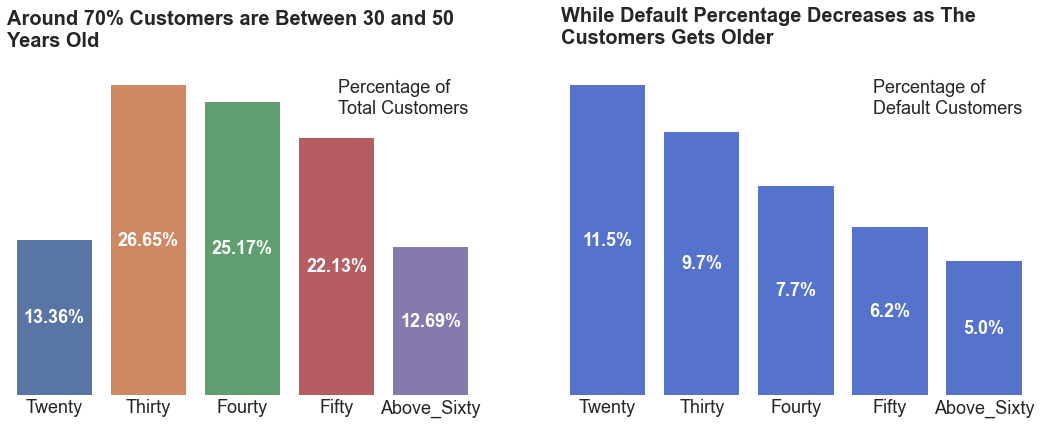

In [21]:
style.use('seaborn-white')

plt.figure(figsize=(15,6))

#Plot Bar Chart 1
plt.subplot(121)
bar1 = sns.barplot(x=age['AGE_GROUP'], y=age['Pct'], palette=sns.color_palette('deep'))
for p in bar1.patches :
    bar1.annotate('%0.2f'% p.get_height()+'%', xy=(p.get_x() + p.get_width()/2, p.get_height()/2),
                xytext=(0,-5), textcoords='offset points', ha='center', fontsize=18, color='white', weight='bold')
bar1.set(yticks=[])
bar1.set(xlabel=None)
bar1.set(ylabel=None)
bar1.legend(title='Percentage of\nTotal Customers', title_fontsize=18, loc="upper right")
bar1.tick_params(axis='x', which='major', labelsize=18)

#Plot Bar Chart 2
plt.subplot(122)
bar2 = sns.barplot(x=group_age['AGE_GROUP'], y=group_age['Pct_Defaults'], color='royalblue')
for p in bar2.patches :
    bar2.annotate('%0.1f'% p.get_height()+'%', xy=(p.get_x() + p.get_width()/2, p.get_height()/2),
                xytext=(0,-5), textcoords='offset points', ha='center', fontsize=18, color='white', weight='bold')
bar2.set(yticks=[])
bar2.set(xlabel=None)
bar2.set(ylabel=None)
bar2.legend(title='Percentage of\nDefault Customers', title_fontsize=18, loc="upper right")
bar2.tick_params(axis='x', which='major', labelsize=18)

bar1.text(x=-0.5, y=30, s='Around 70% Customers are Between 30 and 50 \nYears Old',
         fontsize=20, weight='bold')
bar2.text(x=-0.5, y=13, s='While Default Percentage Decreases as The\nCustomers Gets Older',
         fontsize=20, weight='bold')

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.savefig('age', dpi=200)
plt.show()

## Region Rating With City

- We can see that 'REGION_RATING_CLIENT_W_CITY' have correlations value 0.060893 with 'TARGET'. We can indicate from those value that the higher the rating is, the more likely they will Default.
- So in this stage we will Visualize it so it's easier to understand.

In [22]:
group_reg = df_train.groupby(['REGION_RATING_CLIENT_W_CITY', 'TARGET'])['SK_ID_CURR'].nunique().reset_index(name='NUM_OF_CUSTOMERS')
group_reg['Pct_Defaults'] = round((group_reg['NUM_OF_CUSTOMERS']*100)/group_reg.groupby(['REGION_RATING_CLIENT_W_CITY'])['NUM_OF_CUSTOMERS'].transform('sum'),2)
group_reg = group_reg[group_reg['TARGET']==1]
group_reg

,REGION_RATING_CLIENT_W_CITY,TARGET,NUM_OF_CUSTOMERS,Pct_Defaults
1,1,1,1654,4.84
3,2,1,18170,7.92
5,3,1,5001,11.40


In [23]:
reg = df_train.groupby(['REGION_RATING_CLIENT_W_CITY'])['SK_ID_CURR'].nunique().reset_index(name='NUM_OF_CUSTOMERS')
reg['Pct'] = round((reg['NUM_OF_CUSTOMERS']*100)/df_train['SK_ID_CURR'].nunique(),2)
reg

,REGION_RATING_CLIENT_W_CITY,NUM_OF_CUSTOMERS,Pct
0,1,34167,11.11
1,2,229484,74.63
2,3,43860,14.26


No handles with labels found to put in legend.


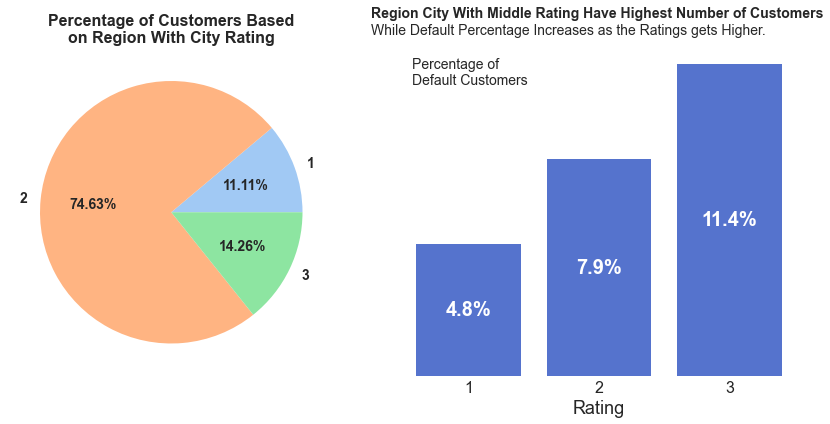

In [24]:
style.use('seaborn-white')

plt.figure(figsize=(13,6))

#Plot Pie Chart 
plt.subplot(121)
color1 = sns.color_palette('pastel')
pie = plt.pie(reg['Pct'], labels=reg['REGION_RATING_CLIENT_W_CITY'], colors=color1, autopct='%0.2f%%', 
               textprops={'fontsize':14,'fontweight':'bold'})
plt.title('Percentage of Customers Based\non Region With City Rating', weight='bold', fontsize=16)

#Plot Bar Chart 
plt.subplot(122)
bar = sns.barplot(x=group_reg['REGION_RATING_CLIENT_W_CITY'], y=group_reg['Pct_Defaults'], color='royalblue')
for p in bar.patches :
    bar.annotate('%0.1f'% p.get_height()+'%', xy=(p.get_x() + p.get_width()/2, p.get_height()/2),
                xytext=(0,-5), textcoords='offset points', ha='center', fontsize=20, color='white', weight='bold')
bar.set(yticks=[])
bar.set(xlabel='Rating')
bar.xaxis.label.set_fontsize(18)
bar.set(ylabel=None)
bar.legend(title='Percentage of\nDefault Customers', title_fontsize=14, loc="upper left")
bar.tick_params(axis='x', which='major', labelsize=16)

bar.text(x=-0.75, y=13.1, s='Region City With Middle Rating Have Highest Number of Customers',
         fontsize=14, weight='bold')
bar.text(x=-0.75, y=12.5, s='While Default Percentage Increases as the Ratings gets Higher.',
         fontsize=14)

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.savefig('reg', dpi=200)
plt.show()

## Code Gender

In [25]:
df_train['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

There are Invalid Data in 'CODE_GENDER' column. We will change that value with mode value from 'CODE_GENDER' column.

In [26]:
gndr_mode = df_train['CODE_GENDER'].mode()[0]
df_train['CODE_GENDER'] = df_train['CODE_GENDER'].replace('XNA', gndr_mode)

In [27]:
group_gndr = df_train.groupby(['CODE_GENDER', 'TARGET'])['SK_ID_CURR'].nunique().reset_index(name='NUM_OF_CUSTOMERS')
group_gndr['Pct_Target'] = round((group_gndr['NUM_OF_CUSTOMERS']*100)/group_gndr.groupby(['CODE_GENDER'])['NUM_OF_CUSTOMERS'].transform('sum'),2)
group_gndr['TARGET'] = group_gndr['TARGET'].replace([0,1],['Non-Default','Default'])
group_gndr['CODE_GENDER'] = group_gndr['CODE_GENDER'].replace(['F','M'], ['Female','Male'])
group_gndr

,CODE_GENDER,TARGET,NUM_OF_CUSTOMERS,Pct_Target
0,Female,Non-Default,188282,93.00
1,Female,Default,14170,7.00
2,Male,Non-Default,94404,89.86
3,Male,Default,10655,10.14


In [28]:
gndr = df_train.groupby(['CODE_GENDER'])['SK_ID_CURR'].nunique().reset_index(name='NUM_OF_CUSTOMERS')
gndr['Pct'] = round((gndr['NUM_OF_CUSTOMERS']*100)/df_train['SK_ID_CURR'].nunique(),2)
gndr['CODE_GENDER'] = gndr['CODE_GENDER'].replace(['F','M'], ['Female','Male'])
gndr

,CODE_GENDER,NUM_OF_CUSTOMERS,Pct
0,Female,202452,65.84
1,Male,105059,34.16


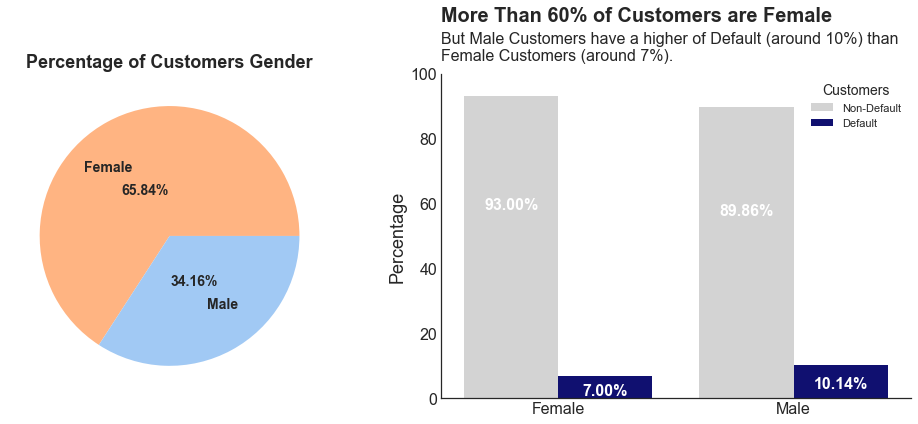

In [29]:
style.use('seaborn-white')

plt.figure(figsize=(15,6))

#Plot Pie Chart
plt.subplot(121)
color1 = [sns.color_palette('pastel')[1],sns.color_palette('pastel')[0]]
pie = plt.pie(gndr['Pct'], labels=gndr['CODE_GENDER'], colors=color1, autopct='%0.2f%%', labeldistance=0.6, 
              pctdistance=0.4, textprops={'fontsize':14,'fontweight':'bold'})
plt.title('Percentage of Customers Gender', weight='bold', fontsize=18)

#Plot Bar Chart
plt.subplot(122)
bar = sns.barplot(x=group_gndr['CODE_GENDER'], y=group_gndr['Pct_Target'], hue=group_gndr['TARGET'],
                  palette=['lightgrey','navy'])
for p in bar.patches :
    bar.annotate('%0.2f'% p.get_height()+'%', xy=(p.get_x() + p.get_width()/2, p.get_height()/1.5),
                xytext=(0,-12), textcoords='offset points', ha='center', fontsize=16, color='w', weight='bold')
bar.set_ylim(0, 100)
bar.set(xlabel=None)
bar.set(ylabel='Percentage')
bar.yaxis.label.set_fontsize(18)
bar.tick_params(axis='both', which='major', labelsize=16)
bar.legend(title='Customers', title_fontsize=14, fontsize = 11, loc="upper right")

bar.text(x=-0.5, y=116, s='More Than 60% of Customers are Female',
         fontsize=20, weight='bold')
bar.text(x=-0.5, y=104, s='But Male Customers have a higher of Default (around 10%) than \nFemale Customers (around 7%).',
         fontsize=16)

sns.despine()
plt.tight_layout()
plt.savefig('gender', dpi=200)
plt.show()

## External Sources

Columns 'EXT_SOURCE_1', 'EXT_SOURCE_2', and 'EXT_SOURCE_3' have highest correlations value with 'TARGET'. According to the documentation, these features represent a "normalized score from external data source"

Text(0.5, 1.0, 'Correlation Heatmap')

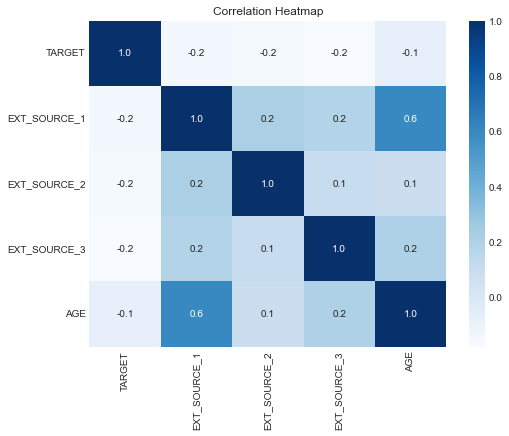

In [30]:
ext_source_data = df_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'AGE']]

plt.figure(figsize = (8, 6))

sns.heatmap(ext_source_data.corr(), cmap='Blues', annot=True, fmt='.1f')
plt.title('Correlation Heatmap')

- All External Source features have negative correlations with Target, it indicatiing that as the value of the EXT_SOURCE increases, the customer is less likely to Default the loan.
- We can also see that AGE is positively correlated with EXT_SOURCE_1, indicating that maybe one of the factors in this score is the customer age.

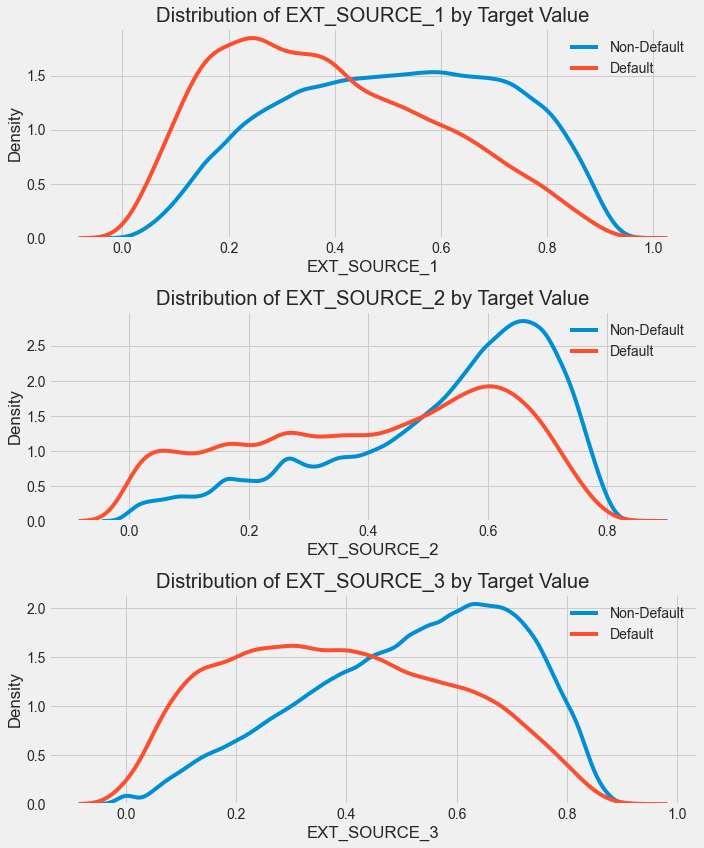

In [31]:
style.use('fivethirtyeight')

plt.figure(figsize = (10, 12))

for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    plt.subplot(3, 1, i + 1)
    sns.kdeplot(df_train.loc[df_train['TARGET'] == 0, source], label = 'Non-Default') # plot repaid loans
    sns.kdeplot(df_train.loc[df_train['TARGET'] == 1, source], label = 'Default')  # plot loans that were not repaid
    
    plt.title('Distribution of %s by Target Value' % source)
    plt.legend()
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout()

## Anomalies

In [32]:
df_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

Max value for column 'DAYS_EMPLOYED' doesn't look right. The value is 365243 days or 1000 years which doesn't make senses. In this case, since all the anomalies have the exact same value, we want to fill them in with the same value in case all of these loans share something in common. As a solution, we will fill in the anomalous values with not a number (np.nan) and then create a new boolean column indicating whether or not the value was anomalous.

In [33]:
df_train['DAYS_EMPLOYED_ANOM'] = np.where(df_train['DAYS_EMPLOYED'] == 365243,1,0)
df_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# Data Cleaning & Processing

## Missing Value

In [34]:
def missing_values_table(df):
        miss_val = df.isnull().sum()
        
        miss_val_percent = 100 * df.isnull().sum() / len(df)
        
        miss_val_table = pd.concat([miss_val, miss_val_percent], axis=1)
        
        miss_val_table_ren_columns = miss_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        miss_val_table_ren_columns = miss_val_table_ren_columns[
            miss_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(miss_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return miss_val_table_ren_columns

In [35]:
train_missing_values = missing_values_table(df_train)
train_missing_values[train_missing_values['% of Total Values']>=40]

Your selected dataframe has 126 columns.
There are 68 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MODE,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MEDI,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4
LIVINGAPARTMENTS_MODE,210199,68.4


Most Features with high Missing Value percentage related to Customers Building/House. This can be caused because customers did not fill this data when applying loan.

In [36]:
features = train_missing_values[train_missing_values['% of Total Values']>=40].index.to_list()
features.append('TARGET')

In [37]:
correlations = df_train[features].corr()['TARGET'].sort_values(ascending=False) 

correlations

TARGET                          1.000000
OWN_CAR_AGE                     0.037612
NONLIVINGAPARTMENTS_MODE       -0.001557
NONLIVINGAPARTMENTS_MEDI       -0.002757
NONLIVINGAPARTMENTS_AVG        -0.003176
YEARS_BEGINEXPLUATATION_MODE   -0.009036
YEARS_BEGINEXPLUATATION_AVG    -0.009728
YEARS_BEGINEXPLUATATION_MEDI   -0.009993
LANDAREA_MODE                  -0.010174
LANDAREA_AVG                   -0.010885
LANDAREA_MEDI                  -0.011256
NONLIVINGAREA_MODE             -0.012711
NONLIVINGAREA_MEDI             -0.013337
NONLIVINGAREA_AVG              -0.013578
COMMONAREA_MODE                -0.016340
ENTRANCES_MODE                 -0.017387
COMMONAREA_AVG                 -0.018550
COMMONAREA_MEDI                -0.018573
ENTRANCES_MEDI                 -0.019025
ENTRANCES_AVG                  -0.019172
BASEMENTAREA_MODE              -0.019952
YEARS_BUILD_MODE               -0.022068
BASEMENTAREA_MEDI              -0.022081
YEARS_BUILD_AVG                -0.022149
YEARS_BUILD_MEDI

We will drop all those features except 'EXT_SOURCE_1'

In [38]:
df_train_clean = df_train.copy()

In [39]:
temp = ['TARGET','EXT_SOURCE_1']

for col in temp :
    features.remove(col)

ValueError: list.remove(x): x not in list

In [40]:
df_train_clean.drop(columns=features, inplace=True)

In [41]:
df_train_clean.shape

(307511, 78)

For others Features we will use Imputation using Median for Numerical Features and Mode for the others.

In [42]:
nums = []
cats = []
dis_num = []

for col in df_train_clean.columns :
    if df_train_clean[col].dtype == 'object' :
        cats.append(col)
    elif df_train_clean[col].nunique() < 25 :
        dis_num.append(col)
    else :
        nums.append(col)
print(len(nums))
print(len(cats))
print(len(dis_num))

18
13
47


In [43]:
train_missing_values = missing_values_table(df_train_clean)

index = train_missing_values.index.to_list()

Your selected dataframe has 78 columns.
There are 20 columns that have missing values.


In [44]:
for col in index :
    if col in nums:
        df_train_clean[col].fillna(df_train_clean[col].median(), inplace=True)
    else :
        df_train_clean[col].fillna(df_train_clean[col].mode()[0], inplace=True)

In [45]:
train_missing_values = missing_values_table(df_train_clean)
train_missing_values

Your selected dataframe has 78 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


## Duplicated Data

In [46]:
df_train_clean.duplicated().sum()

0

In [47]:
df_train_clean['SK_ID_CURR'].duplicated().sum()

0

## Feature Engineering

In [48]:
df_train_clean.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,AGE_GROUP,IS_PARENTS,DAYS_EMPLOYED_ANOM
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637.0,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,26.0,Twenty,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188.0,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,0.535276,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,Fourty,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225.0,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.505998,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,Fifty,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039.0,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.505998,0.650442,0.535276,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,52.0,Fifty,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038.0,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.505998,0.322738,0.535276,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,Fifty,0,0


In [49]:
for col in cats :  
    group = df_train_clean.groupby(col)['SK_ID_CURR'].nunique().reset_index(name='NUM_OF_CUSTOMERS')
    group['Pct'] = round((group['NUM_OF_CUSTOMERS']*100)/df_train_clean['SK_ID_CURR'].nunique(),2)
    print(group.sort_values('Pct', ascending=False))
    print("---------------------------------------")

  NAME_CONTRACT_TYPE  NUM_OF_CUSTOMERS    Pct
0         Cash loans            278232  90.48
1    Revolving loans             29279   9.52
---------------------------------------
  CODE_GENDER  NUM_OF_CUSTOMERS    Pct
0           F            202452  65.84
1           M            105059  34.16
---------------------------------------
  FLAG_OWN_CAR  NUM_OF_CUSTOMERS    Pct
0            N            202924  65.99
1            Y            104587  34.01
---------------------------------------
  FLAG_OWN_REALTY  NUM_OF_CUSTOMERS    Pct
1               Y            213312  69.37
0               N             94199  30.63
---------------------------------------
   NAME_TYPE_SUITE  NUM_OF_CUSTOMERS    Pct
6    Unaccompanied            249818  81.24
1           Family             40149  13.06
5  Spouse, partner             11370   3.70
0         Children              3267   1.06
4          Other_B              1770   0.58
3          Other_A               866   0.28
2  Group of people          

For Categorical Features with unique value more than 2 we can take advantage of the dominant value to create a new features.

In [50]:
df_train_preprocessing = df_train_clean.copy()

In [51]:
#From NAME_TYPE_SUITE to Is_Unaccompanied
df_train_preprocessing['Is_Unaccompanied'] = np.where(df_train_preprocessing['NAME_TYPE_SUITE']=='Unaccompanied',1,0)

#From NAME_INCOME_TYPE to Is_Working
df_train_preprocessing['Is_Working'] = np.where(df_train_preprocessing['NAME_INCOME_TYPE']=='Working',1,0)

#From NAME_EDUCATION_TYPE to Is_Secondary/secondary special
df_train_preprocessing['Is_Secondary/secondary special'] = np.where(df_train_preprocessing['NAME_EDUCATION_TYPE']=='Secondary/secondary special', 1,0)

#From NAME_FAMILY_STATUS to Is_Married
df_train_preprocessing['Is_Married'] = np.where(df_train_preprocessing['NAME_FAMILY_STATUS']=='Married',1,0)

#From NAME_HOUSING_TYPE to Is_House/apartment
df_train_preprocessing['Is_House/apartment'] = np.where(df_train_preprocessing['NAME_HOUSING_TYPE']=='House / apartment',1,0)

#From OCCUPATION_TYPE to Is_Laborers
df_train_preprocessing['Is_Laborers'] = np.where(df_train_preprocessing['OCCUPATION_TYPE']=='Laborers',1,0)

We will drop Feature 'ORGANIZATION_TYPE' because it has to many unique value without any dominant value.

In [52]:
cols = ['NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE', 'ORGANIZATION_TYPE']

df_train_preprocessing.drop(columns=cols, inplace=True)

### Label Encoding

In [53]:
#Feature Contract Type
mapping_cnt = {'Cash loans':0,
              'Revolving loans':1
              }

#Feature Gender
mapping_gender = {'F':0,
                  'M':1
                 }

#Feature Car Ownership
mapping_car = {'N':0,
               'Y':1
              }

#Feature House Ownership
mapping_house = {'N':0,
                 'Y':1
                }

In [54]:
df_train_preprocessing['NAME_CONTRACT_TYPE'] = df_train_preprocessing['NAME_CONTRACT_TYPE'].map(mapping_cnt)

df_train_preprocessing['CODE_GENDER'] = df_train_preprocessing['CODE_GENDER'].map(mapping_gender)

df_train_preprocessing['FLAG_OWN_CAR'] = df_train_preprocessing['FLAG_OWN_CAR'].map(mapping_car)

df_train_preprocessing['FLAG_OWN_REALTY'] = df_train_preprocessing['FLAG_OWN_REALTY'].map(mapping_house)

### One-Hot Encoding

In [55]:
day_train = pd.get_dummies(df_train_preprocessing['WEEKDAY_APPR_PROCESS_START'], prefix='Is')

In [56]:
df_train_preprocessing = df_train_preprocessing.join(day_train)

In [57]:
df_train_preprocessing.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,AGE_GROUP,IS_PARENTS,DAYS_EMPLOYED_ANOM,Is_Unaccompanied,Is_Working,Is_Secondary/secondary special,Is_Married,Is_House/apartment,Is_Laborers,Is_FRIDAY,Is_MONDAY,Is_SATURDAY,Is_SUNDAY,Is_THURSDAY,Is_TUESDAY,Is_WEDNESDAY
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637.0,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,0.083037,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,26.0,Twenty,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188.0,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,0.311267,0.622246,0.535276,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,Fourty,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225.0,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,0.505998,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,Fifty,0,0,1,1,0,0,1,1,0,1,0,0,0,0,0
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039.0,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,0.505998,0.650442,0.535276,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,52.0,Fifty,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038.0,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,0.505998,0.322738,0.535276,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,Fifty,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0


# Modeling

In [58]:
cols = ['SK_ID_CURR', 'WEEKDAY_APPR_PROCESS_START', 'AGE_GROUP']

data = df_train_preprocessing.drop(columns=cols)

In [59]:
data.shape

(307511, 81)

In [60]:
data.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,IS_PARENTS,DAYS_EMPLOYED_ANOM,Is_Unaccompanied,Is_Working,Is_Secondary/secondary special,Is_Married,Is_House/apartment,Is_Laborers,Is_FRIDAY,Is_MONDAY,Is_SATURDAY,Is_SUNDAY,Is_THURSDAY,Is_TUESDAY,Is_WEDNESDAY
0,1,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637.0,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,10,0,0,0,0,0,0,0.083037,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,26.0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1
1,0,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188.0,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,11,0,0,0,0,0,0,0.311267,0.622246,0.535276,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0
2,0,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225.0,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,9,0,0,0,0,0,0,0.505998,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,0
3,0,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039.0,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,17,0,0,0,0,0,0,0.505998,0.650442,0.535276,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,52.0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1
4,0,0,1,0,1,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038.0,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,11,0,0,0,0,1,1,0.505998,0.322738,0.535276,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0


In [61]:
X = data.drop(columns='TARGET')
y = data['TARGET']

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [64]:
X_train.shape

(215257, 80)

In [65]:
X_test.shape

(92254, 80)

In [66]:
y_train.shape

(215257,)

In [67]:
y_test.shape

(92254,)

In [68]:
y_train.value_counts()

0    197845
1     17412
Name: TARGET, dtype: int64

In [69]:
from imblearn import under_sampling, over_sampling

In [70]:
X_train_SMOTE, y_train_SMOTE = over_sampling.SMOTE().fit_resample(X_train,y_train)

## Scaling

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
X_train_scaled = X_train_SMOTE.copy()
X_test_scaled = X_test.copy()

In [73]:
cols = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_BIRTH',
        'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE', 'AGE']

for col in cols :
    X_train_scaled[col] = StandardScaler().fit_transform(X_train_scaled[col].values.reshape(len(X_train_scaled), 1))
    X_test_scaled[col] = StandardScaler().fit_transform(X_test_scaled[col].values.reshape(len(X_test_scaled), 1))

## Create Machine Learning Model

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics

In [75]:
models = {
    "LogisticRegression" : LogisticRegression(),
    "RandomForest" : RandomForestClassifier(random_state=42),
    "DecisionTree" : DecisionTreeClassifier()
}

for model_name, clf in models.items() :
    clf.fit(X_train_scaled,y_train_SMOTE)
    y_pred = clf.predict(X_test_scaled)
    y_pred_proba = clf.predict_proba(X_test_scaled)[:,1]
    
    print("Evaluate model: {}".format(model_name))
    
    accuracy_test = metrics.accuracy_score(y_test,y_pred)
    print("Accuracy Test :" + str(round(accuracy_test*100,2)) + '%')
    precission_test = metrics.precision_score(y_test,y_pred,pos_label=1)
    print("Precission Test :" + str(round(precission_test*100,2)) + '%')
    recall_test = metrics.recall_score(y_test,y_pred,pos_label=1)
    print("Recall Test :" + str(round(recall_test*100,2)) + '%')
    f1_test = metrics.f1_score(y_test,y_pred,pos_label=1)
    print("F1 Test :" + str(round(f1_test*100,2)) + '%')
    roc_auc_test = metrics.roc_auc_score(y_test, y_pred_proba)
    print("ROC-AUC Test :" + str(round(roc_auc_test*100,2)) + '%')
    print("\n")

C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Evaluate model: LogisticRegression
Accuracy Test :89.89%
Precission Test :21.72%
Recall Test :9.92%
F1 Test :13.61%
ROC-AUC Test :67.77%


Evaluate model: RandomForest
Accuracy Test :91.88%
Precission Test :26.59%
Recall Test :0.62%
F1 Test :1.21%
ROC-AUC Test :66.43%


Evaluate model: DecisionTree
Accuracy Test :81.58%
Precission Test :11.73%
Recall Test :19.79%
F1 Test :14.73%
ROC-AUC Test :53.39%




- Because the Target is Imbalance and we want to focus to Both Positive Label & Negative Label we will use Metric : ROC-AUC for our Model Evaluation.
- Based on score from 3 different Alogirthm, Logistic Regression have a better ROC-AUC score than the others.
- So we will use Logistic Regression for future Analysis.

## Model Evaluation

### Hyperparameter Tuning

We use these parameters based on Warning that pops up earlier when looking for a suitable Algorithm.
- ConvergenceWarning: lbfgs failed to converge (status=1)
- Increase the number of iterations (max_iter)

In this section we will try to add several paramaters :
- max_iter : Maximum number of iterations taken for the solvers to converge (default=100). We try to increase the value to 200. 
- solver : Algorithm to use in the optimization problem. Default is ‘lbfgs’. To choose a solver, you might want to consider the following aspects: 
    - __For small datasets, ‘liblinear’ is a good choice__, whereas ‘sag’ and ‘saga’ are faster for large ones;
    - For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss;
    - ‘liblinear’ and is limited to one-versus-rest schemes.
    - ‘newton-cholesky’ is a good choice for n_samples >> n_features, especially with one-hot encoded categorical features with rare categories. Note that it is limited to binary classification and the one-versus-rest reduction for multiclass classification. Be aware that the memory usage of this solver has a quadratic dependency on n_features because it explicitly computes the Hessian matrix.
- random_state : __Used when solver__ ==‘sag’, ‘saga’ or __‘liblinear’__ to shuffle the data.
- fit_interceptbool : Default is True. Specifies if a constant (a.k.a. bias or intercept) should be added to the decision function.
- intercept_scalingfloat : Default=1. Useful only when the solver ‘liblinear’ is used and self.fit_intercept is set to True. In this case, x becomes [x, self.intercept_scaling], i.e. a “synthetic” feature with constant value equal to intercept_scaling is appended to the instance vector. The intercept becomes intercept_scaling * synthetic_feature_weight.

Source : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [76]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [77]:
hyperparams = dict(
                        max_iter = [int(x) for x in np.linspace(100,200,20)],
                        fit_intercept = [True],
                        intercept_scaling = [float(x) for x in np.linspace(1,10,1)],
                        solver=['liblinear'] 
                    )

In [78]:
logreg = LogisticRegression()
log_ran = RandomizedSearchCV(logreg, hyperparams, scoring='roc_auc')
log_ran.fit(X_train_scaled,y_train_SMOTE)

RandomizedSearchCV(estimator=LogisticRegression(),
                   param_distributions={'fit_intercept': [True],
                                        'intercept_scaling': [1.0],
                                        'max_iter': [100, 105, 110, 115, 121,
                                                     126, 131, 136, 142, 147,
                                                     152, 157, 163, 168, 173,
                                                     178, 184, 189, 194, 200],
                                        'solver': ['liblinear']},
                   scoring='roc_auc')

In [79]:
y_pred = log_ran.predict(X_test_scaled)
y_pred_proba = log_ran.predict_proba(X_test_scaled)[:,1]

accuracy_test = metrics.accuracy_score(y_test,y_pred)
print("Accuracy Test :" + str(round(accuracy_test*100,2)) + '%')
precission_test = metrics.precision_score(y_test,y_pred,pos_label=1)
print("Precission Test :" + str(round(precission_test*100,2)) + '%')
recall_test = metrics.recall_score(y_test,y_pred,pos_label=1)
print("Recall Test :" + str(round(recall_test*100,2)) + '%')
f1_test = metrics.f1_score(y_test,y_pred,pos_label=1)
print("F1 Test :" + str(round(f1_test*100,2)) + '%')
roc_auc_test = metrics.roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC Test :" + str(round(roc_auc_test*100,2)) + '%')

Accuracy Test :90.14%
Precission Test :22.28%
Recall Test :9.13%
F1 Test :12.95%
ROC-AUC Test :68.69%


In [80]:
for key, value in hyperparams.items() :
        print(key+':', log_ran.best_estimator_.get_params()[key])

max_iter: 121
fit_intercept: True
intercept_scaling: 1.0
solver: liblinear


- The resulting score after trying to find parameters using Hyperparameter Tuning didn't change that much.
- And the parameters obtained are still the same as the default value except for max_itter.
- We will use only use parameter solver, max_itter and random_state.

In [87]:
logreg = LogisticRegression(solver='liblinear', max_iter=121, random_state=42)
logreg.fit(X_train_scaled,y_train_SMOTE)

LogisticRegression(max_iter=121, random_state=42, solver='liblinear')

In [88]:
y_pred = logreg.predict(X_test_scaled)
y_pred_proba = logreg.predict_proba(X_test_scaled)[:,1]

accuracy_test = metrics.accuracy_score(y_test,y_pred)
print("Accuracy Test :" + str(round(accuracy_test*100,2)) + '%')
precission_test = metrics.precision_score(y_test,y_pred,pos_label=1)
print("Precission Test :" + str(round(precission_test*100,2)) + '%')
recall_test = metrics.recall_score(y_test,y_pred,pos_label=1)
print("Recall Test :" + str(round(recall_test*100,2)) + '%')
f1_test = metrics.f1_score(y_test,y_pred,pos_label=1)
print("F1 Test :" + str(round(f1_test*100,2)) + '%')
roc_auc_test = metrics.roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC Test :" + str(round(roc_auc_test*100,2)) + '%')

Accuracy Test :90.14%
Precission Test :22.28%
Recall Test :9.13%
F1 Test :12.95%
ROC-AUC Test :68.69%


In [89]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

In [90]:
def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

ROC-AUC score: 0.6868719488010372


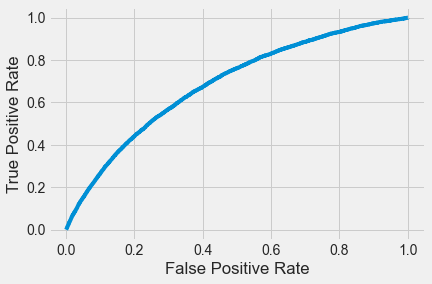

In [91]:
plot_roc_curve(y_test, y_pred_proba)
print('ROC-AUC score:',roc_auc_score(y_test, y_pred_proba))

The Plot and Score above show that our AUC score has a value of around 70% (0.7) where the value is close to 1. It shows that the model has the ability to separate the two classes and the curve would come closer to the top left corner of the graph.

### Confussion Matrix

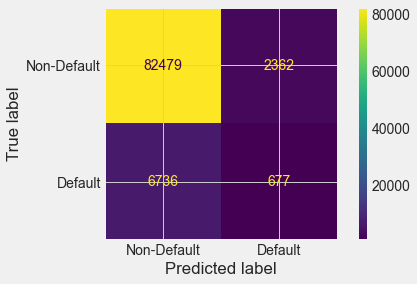

In [92]:
cm = confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Non-Default','Default'])

cm_display.plot()
plt.show()